EDA

Data Import and Preprocessing

In [102]:
import pandas as pd
sales_pipeline = pd.read_csv('sales_pipeline.csv')
sales_pipeline.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [106]:
sales_pipeline['close_date'] = pd.to_datetime(sales_pipeline['close_date'])
sales_pipeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   opportunity_id  8800 non-null   object        
 1   sales_agent     8800 non-null   object        
 2   product         8800 non-null   object        
 3   account         7375 non-null   object        
 4   deal_stage      8800 non-null   object        
 5   engage_date     8300 non-null   object        
 6   close_date      6711 non-null   datetime64[ns]
 7   close_value     6711 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 550.1+ KB


Filtering the data where data_stage = "Won"

In [143]:
sales_pipeline['product'].unique()

array(['GTX Plus Basic', 'GTXPro', 'MG Special', 'GTX Basic',
       'MG Advanced', 'GTX Plus Pro', 'GTK 500'], dtype=object)

I notice that 'GTXPro' is one word, not two. 

In [148]:
sales_pipeline['product'].replace('GTXPro', 'GTX Pro', inplace = True)
sales_pipeline['product'].unique()

array(['GTX Plus Basic', 'GTX Pro', 'MG Special', 'GTX Basic',
       'MG Advanced', 'GTX Plus Pro', 'GTK 500'], dtype=object)

In [150]:
won_deals = sales_pipeline.loc[sales_pipeline['deal_stage'] == 'Won']
won_deals['deal_stage'].unique()

array(['Won'], dtype=object)

Statistical Summaries

Overall Sales Performance

Total Sales Value

In [152]:
total_sales = won_deals['close_value'].sum().astype(int)
print(f"Total sales for 2017 is ${total_sales}.")

Total sales for 2017 is $10005534.


Average Deal Size

In [154]:
average_sale = round(won_deals['close_value'].mean(), 2)
print(f"The average sale in 2017 is ${average_sale}.")

The average sale in 2017 is $2360.91.


Min & Max Sales

In [156]:
min_sale = round(won_deals['close_value'].min(), 2)
print(f"The min sale in 2017 is ${min_sale}.")

The min sale in 2017 is $38.0.


In [158]:
max_sale = round(won_deals['close_value'].max(), 2)
print(f"The max sale in 2017 is ${max_sale}.")

The max sale in 2017 is $30288.0.


St. Dev and Variance

In [168]:
st_dev = won_deals['close_value'].std()
print(f"The standard deviation of the sales is ${round(st_dev, 2)}.")

The standard deviation of the sales is $2544.48.


//////////////////////////////

Deal outcomes

How many deals are 1.) Won 2.) Lost or 3.) Being Engaged?

In [182]:
deal_outcomes = sales_pipeline['deal_stage'].value_counts()
deal_outcomes

deal_stage
Won            4238
Lost           2473
Engaging       1589
Prospecting     500
Name: count, dtype: int64

In [190]:
print(f"{deal_outcomes['Won']} deals have been won")
print(f"{deal_outcomes['Lost']} deals have been lost")
print(f"{deal_outcomes['Engaging']} deals actively being engaged")

4238 deals have been won
2473 deals have been lost
1589 deals actively being engaged


Calculating Win/Loss Ratio

In [197]:
print(f"Win/Loss Ratio: {round(deal_outcomes['Won'] / deal_outcomes['Lost'], 2)}")

Win/Loss Ratio: 1.71


//////////////////////////////////

Calculating monthly sales

In [203]:
won_deals['month'] = won_deals['close_date'].dt.strftime('%B')
won_deals.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_39612\1562030574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  won_deals['month'] = won_deals['close_date'].dt.strftime('%B')


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,month
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,March
1,Z063OYW0,Darcel Schlecht,GTX Pro,Isdom,Won,2016-10-25,2017-03-11,4514.0,March
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,March
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,March
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,March


In [205]:
monthly_aggregation = won_deals.groupby('month')['close_value'].sum().reset_index()
monthly_aggregation.rename(columns={'month': 'Month', 'close_value': 'Total_Sales'}, inplace = True)
print(monthly_aggregation)

       Month  Total_Sales
0      April     721932.0
1     August    1050059.0
2   December    1131573.0
3       July     696932.0
4       June    1338466.0
5      March    1134672.0
6        May    1025713.0
7   November     938943.0
8    October     731980.0
9  September    1235264.0


I notice that my months are out of order

In [216]:
monthly_aggregation = monthly_aggregation.reindex(index=[5, 0, 6, 4, 3, 1, 9, 8, 7, 2])
monthly_aggregation

,Month,Total_Sales
5,March,1134672.0
0,April,721932.0
6,May,1025713.0
4,June,1338466.0
3,July,696932.0
1,August,1050059.0
9,September,1235264.0
8,October,731980.0
7,November,938943.0
2,December,1131573.0


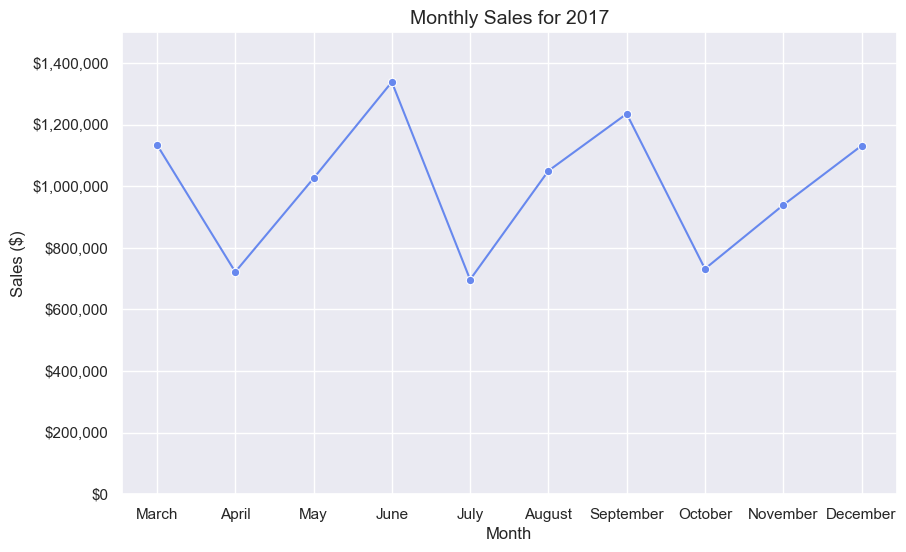

In [220]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_aggregation, x='Month', y='Total_Sales', marker='o')

plt.title('Monthly Sales for 2017', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)

# Format y-axis as dollar values
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.gca().set_ylim([0, 1500000])


# Show the plot
plt.show()

In [224]:
won_deals

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,month
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,March
1,Z063OYW0,Darcel Schlecht,GTX Pro,Isdom,Won,2016-10-25,2017-03-11,4514.0,March
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,March
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,March
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,March
...,...,...,...,...,...,...,...,...,...
8295,2EBLR9N8,Lajuana Vencill,GTX Basic,Conecom,Won,2017-12-24,2017-12-26,622.0,December
8296,VDGA4KXA,Violet Mclelland,GTX Plus Basic,Bluth Company,Won,2017-12-24,2017-12-30,1093.0,December
8297,6WCNNK5J,Maureen Marcano,GTX Pro,Hottechi,Won,2017-12-26,2017-12-29,4433.0,December
8298,YJTQSZ9D,Gladys Colclough,GTX Plus Basic,Inity,Won,2017-12-27,2017-12-30,1052.0,December


In [226]:
product_sales = won_deals.groupby('product')['close_value'].sum().reset_index()
product_sales.rename(columns={'product': 'Product', 'close_value': 'Total_Sales'}, inplace = True)
print(product_sales)

          Product  Total_Sales
0         GTK 500     400612.0
1       GTX Basic     499263.0
2  GTX Plus Basic     705275.0
3    GTX Plus Pro    2629651.0
4         GTX Pro    3510578.0
5     MG Advanced    2216387.0
6      MG Special      43768.0


Let's sort by total sales

In [229]:
product_sales = product_sales.sort_values(by=['Total_Sales'], ascending=False)
product_sales

,Product,Total_Sales
4,GTX Pro,3510578.0
3,GTX Plus Pro,2629651.0
5,MG Advanced,2216387.0
2,GTX Plus Basic,705275.0
1,GTX Basic,499263.0
0,GTK 500,400612.0
6,MG Special,43768.0


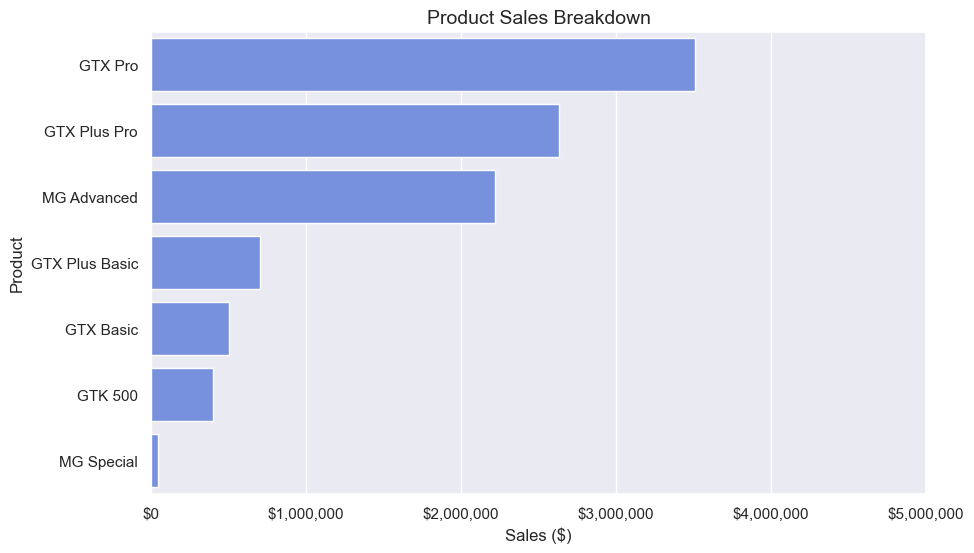

In [237]:
plt.figure(figsize=(10, 6))
sns.barplot(data=product_sales, x='Total_Sales', y='Product')

plt.title('Product Sales Breakdown', fontsize=14)
plt.xlabel('Sales ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)

# Format x-axis as dollar values
import matplotlib.ticker as mtick
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.gca().set_xlim([0, 5000000])


# Show the plot
plt.show()